In [308]:
import pandas as pd

df = pd.read_csv("tripadvisor_review.csv")
df.head(15)


,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
6,User 7,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
7,User 8,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
9,User 10,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12


In [310]:
# 'User ID' hariç tüm sütunlara bakalım (yani sadece Category 1-10 arası)
df["Target"] = df.iloc[:, 1:].idxmax(axis=1)

# İlk 15 satıra bakalım
df.head(15)


,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Target
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,Category 7
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,Category 7
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,Category 7
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,Category 7
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,Category 7
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,Category 10
6,User 7,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22,Category 10
7,User 8,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88,Category 7
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54,Category 7
9,User 10,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12,Category 7


In [312]:
df["Target"].value_counts()


Target
Category 7     790
Category 10    161
Category 8      15
Category 6       8
Category 5       2
Category 1       1
Category 4       1
Category 2       1
Category 3       1
Name: count, dtype: int64

En iyi k değeri: 4, Doğruluk: 0.93367347


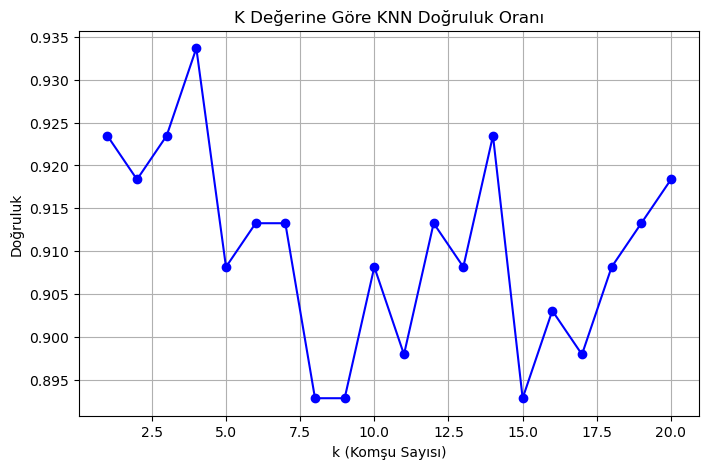

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiket varsa sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# En iyi k değerini bulmak için doğrulukları kaydet
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# En iyi k değeri ve doğruluğu
best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)
print(f"En iyi k değeri: {best_k}, Doğruluk: {best_acc:.8f}")

# Grafikle göster
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title("K Değerine Göre KNN Doğruluk Oranı")
plt.xlabel("k (Komşu Sayısı)")
plt.ylabel("Doğruluk")
plt.grid(True)
plt.show()


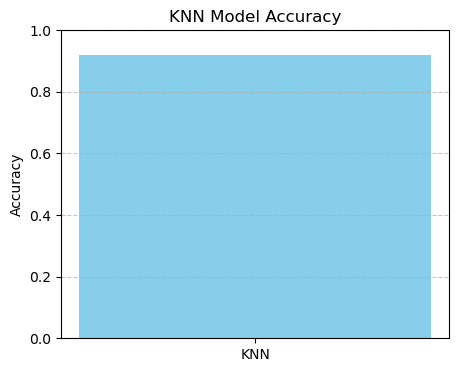

In [315]:
import matplotlib.pyplot as plt

# Doğruluk oranı örneğin %80 olsun
accuracy = accuracy_score(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(5, 4))
plt.bar(['KNN'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [318]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Karar ağacı modelini oluştur ve eğit
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Tahmin yap ve doğruluk hesapla
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Karar Ağacı Modeli Doğruluk Oranı:", accuracy)


Karar Ağacı Modeli Doğruluk Oranı: 0.9948979591836735


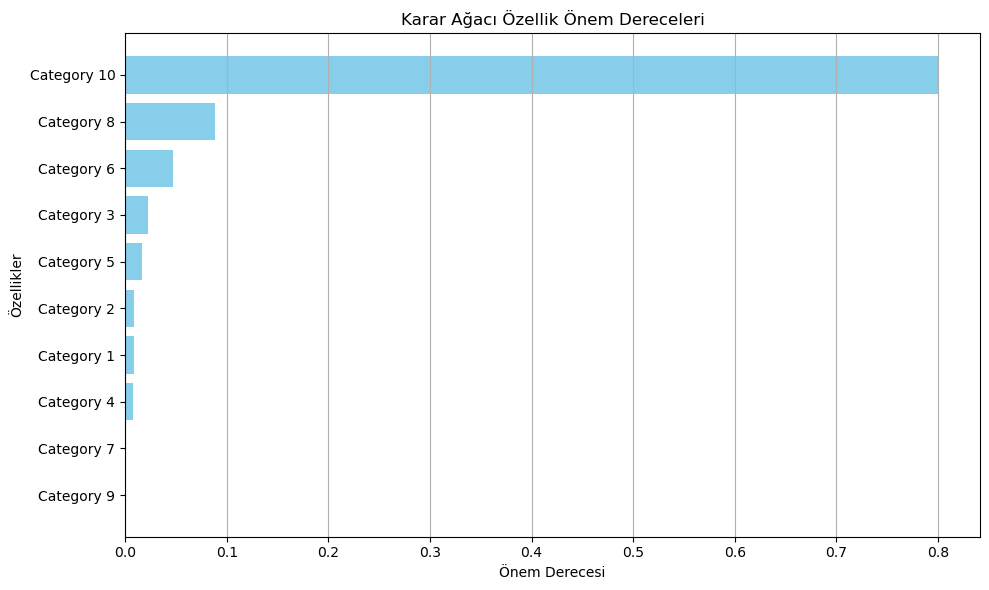

In [320]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Özellik isimlerini al
feature_names = X.columns

# Özellik önemlerini al
importances = dt_model.feature_importances_

# Pandas DataFrame'e çevir ve sırala
importance_df = pd.DataFrame({
    'Özellik': feature_names,
    'Önem Derecesi': importances
}).sort_values(by='Önem Derecesi', ascending=False)

# Grafik çiz
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Özellik'], importance_df['Önem Derecesi'], color='skyblue')
plt.gca().invert_yaxis()  # En önemli en üstte olsun
plt.title("Karar Ağacı Özellik Önem Dereceleri")
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellikler")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


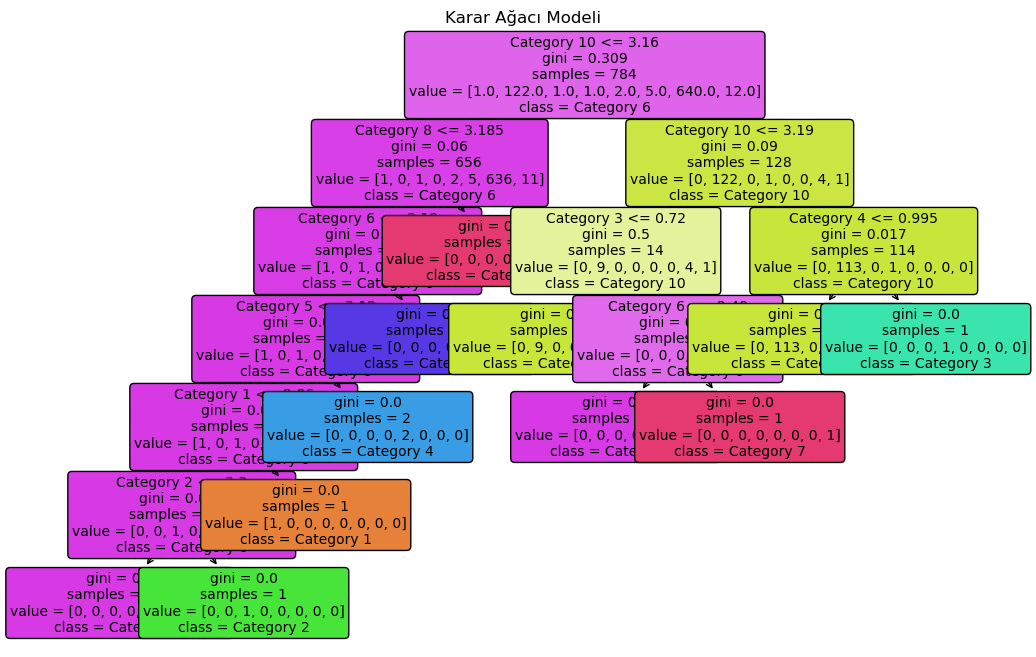

In [276]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Karar ağacı modelini oluştur ve eğit
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Karar ağacını görselleştir
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Karar Ağacı Modeli")
plt.show()


In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lojistik regresyon modelini oluştur ve eğit
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Tahmin yap ve doğruluk hesapla
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Lojistik Regresyon Modeli Doğruluk Oranı:", accuracy)


Lojistik Regresyon Modeli Doğruluk Oranı: 0.9489795918367347


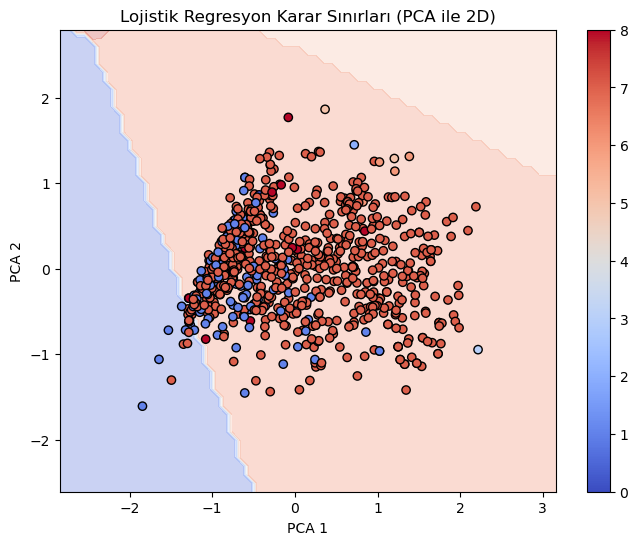

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA ile boyut indirgeme
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Lojistik regresyon modelini oluştur ve eğit
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_pca, y_train)

# Karar sınırlarını çizmek için meshgrid oluşturuyoruz
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Modelin tahminlerini almak için meshgrid üzerinde predict yapıyoruz
Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafiği çiz
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title("Lojistik Regresyon Karar Sınırları (PCA ile 2D)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()


In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rastgele Orman modelini oluştur ve eğit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yap ve doğruluk hesapla
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)

print("Rastgele Orman Modeli Doğruluk Oranı:", rf_accuracy)


Rastgele Orman Modeli Doğruluk Oranı: 0.9948979591836735


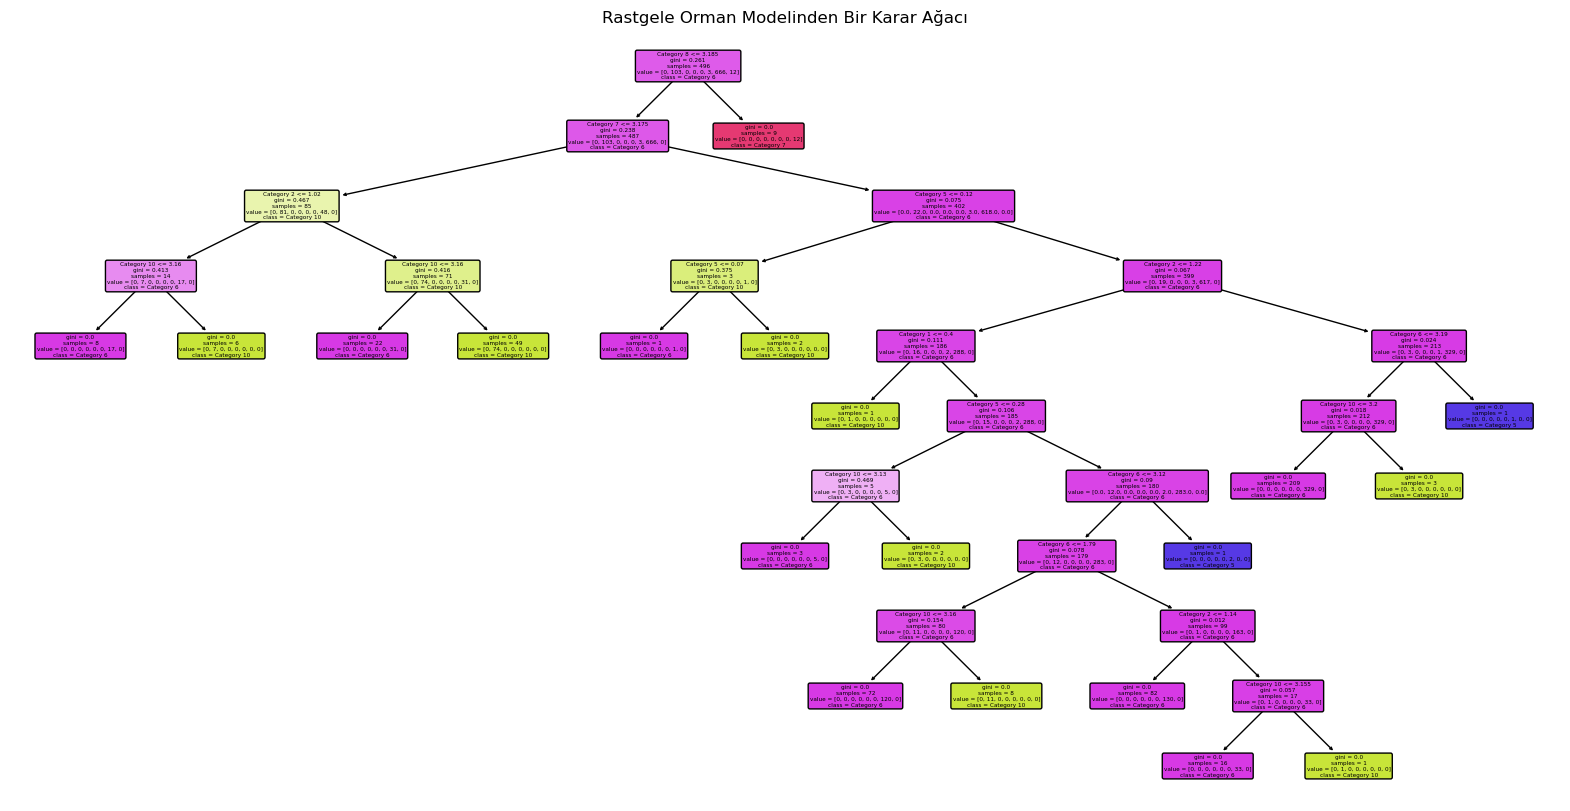

In [280]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rastgele Orman modelini oluştur ve eğit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# İlk ağacı seç ve görselleştir
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True)
plt.title("Rastgele Orman Modelinden Bir Karar Ağacı")
plt.show()


In [281]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM modelini oluştur ve eğit
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Tahmin yap ve doğruluk hesapla
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)

print("SVM Modeli Doğruluk Oranı:", svm_accuracy)


SVM Modeli Doğruluk Oranı: 0.9285714285714286


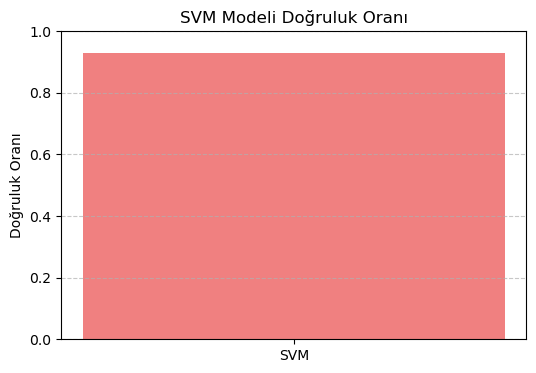

In [282]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM modelini oluştur ve eğit
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Tahmin yap ve doğruluk hesapla
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(6, 4))
plt.bar(['SVM'], [svm_accuracy], color='lightcoral')
plt.ylim(0, 1)
plt.ylabel('Doğruluk Oranı')
plt.title('SVM Modeli Doğruluk Oranı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [283]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes modelini oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Tahmin yap ve doğruluk hesapla
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)

print("Naive Bayes Modeli Doğruluk Oranı:", nb_accuracy)


Naive Bayes Modeli Doğruluk Oranı: 0.8775510204081632


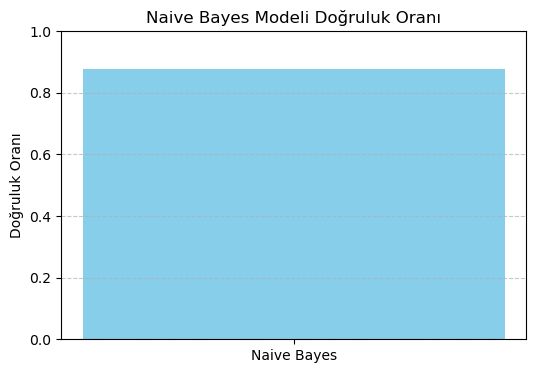

In [284]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes modelini oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Tahmin yap ve doğruluk hesapla
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(6, 4))
plt.bar(['Naive Bayes'], [nb_accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Doğruluk Oranı')
plt.title('Naive Bayes Modeli Doğruluk Oranı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


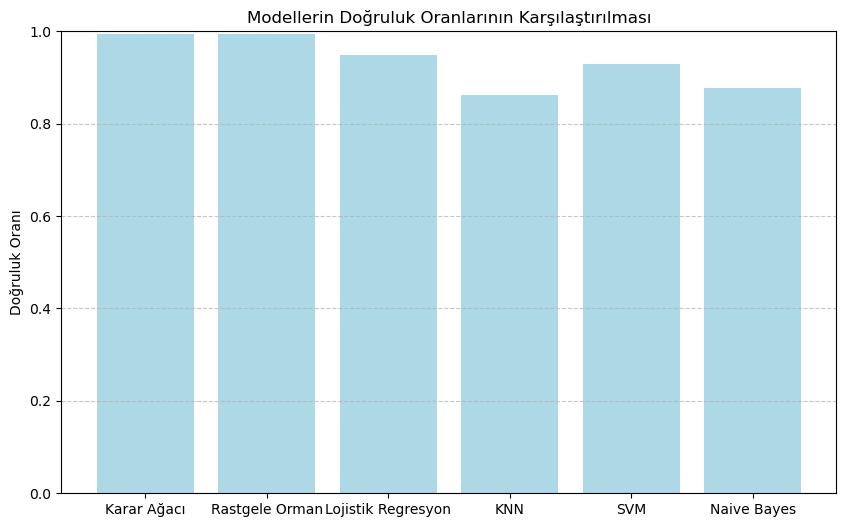

In [285]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımla
models = {
    'Karar Ağacı': DecisionTreeClassifier(random_state=42),
    'Rastgele Orman': RandomForestClassifier(random_state=42),
    'Lojistik Regresyon': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Modellerin doğruluk oranlarını hesapla
accuracies = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color='lightblue')
plt.ylim(0, 1)
plt.ylabel('Doğruluk Oranı')
plt.title('Modellerin Doğruluk Oranlarının Karşılaştırılması')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


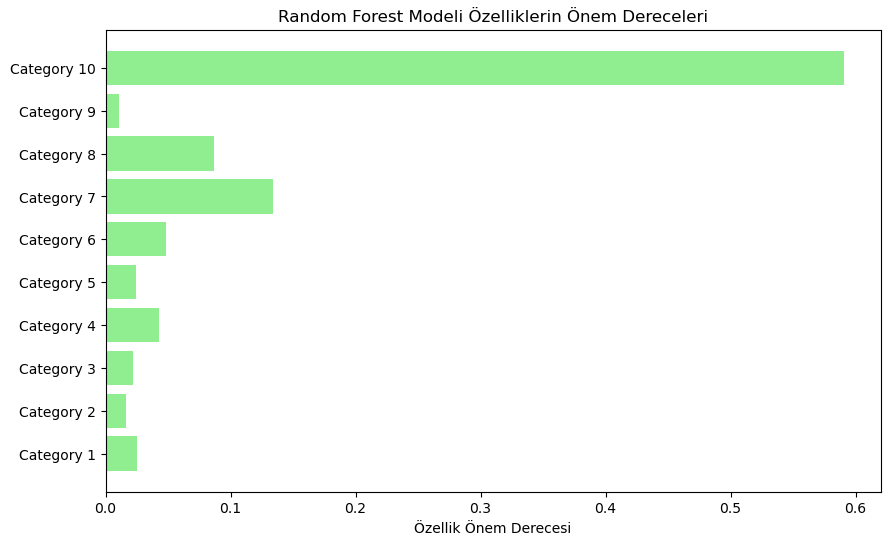

In [286]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Özellikler ve hedef değişkeni ayır
X = df.iloc[:, 1:-1]  # 'User ID' hariç, 'Target' hariç tüm sütunlar
y = df["Target"]

# Kategorik etiketleri sayıya çevir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest modelini oluştur ve eğit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Özelliklerin önem derecelerini al
feature_importances = rf_model.feature_importances_

# Özelliklerin isimlerini al
feature_names = X.columns

# Özelliklerin önem derecelerini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='lightgreen')
plt.xlabel('Özellik Önem Derecesi')
plt.title('Random Forest Modeli Özelliklerin Önem Dereceleri')
plt.show()


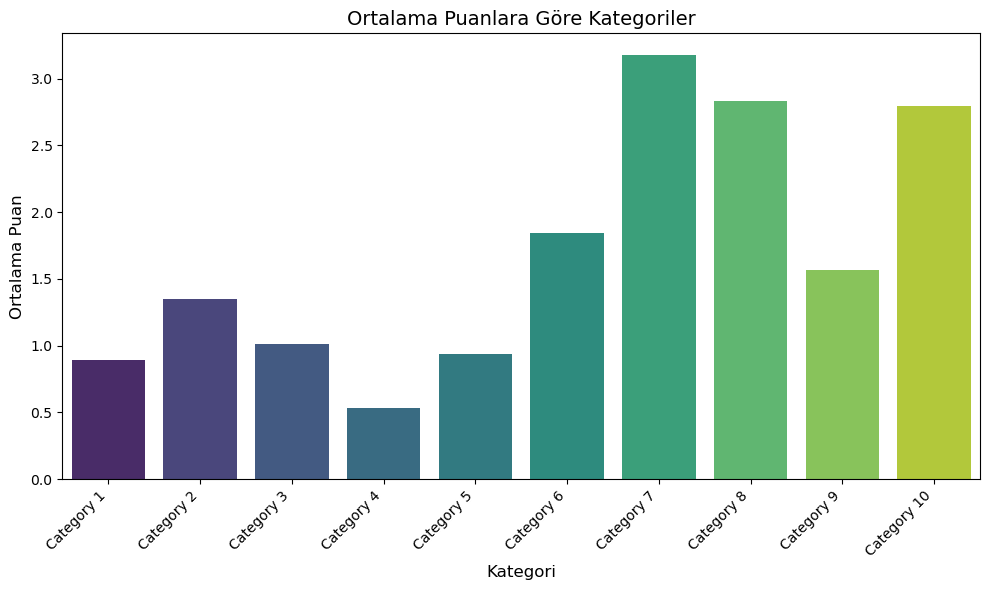

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleyin
df = pd.read_csv('tripadvisor_review.csv')

# Kategorilerin sütun adlarını alalım
category_columns = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 
                    'Category 5', 'Category 6', 'Category 7', 'Category 8', 
                    'Category 9', 'Category 10']

# Her kategori için ortalama puan hesaplayalım
average_ratings = df[category_columns].mean()

# Görselleştirme ayarları
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='viridis', hue=average_ratings.index)

# Başlık ve etiketler
plt.title('Ortalama Puanlara Göre Kategoriler', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Ortalama Puan', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Grafiği göster
plt.tight_layout()
plt.show()


In [288]:
# Eğitim setinde ve test setinde hangi sınıfların olduğunu kontrol et
print("Eğitim setinde hangi sınıflar var:", np.unique(y_train))
print("Test setinde hangi sınıflar var:", np.unique(y_test))

Eğitim setinde hangi sınıflar var: [0 1 2 3 5 6 7 8]
Test setinde hangi sınıflar var: [1 4 6 7 8]
